# Project name -- Credit_card_approval_Prediction


In [107]:
#importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [108]:
independent=pd.read_csv("D:\\00 project\\Credit_card.csv")
dependent=pd.read_csv("D:\\00 project\\Credit_card_label.csv")

In [109]:
independent.head()

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,1,0,0,0,NaN,2
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,NaN,-586,1,1,1,0,NaN,2
3,5009749,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2


In [110]:
dependent.head()

,Ind_ID,label
0,5008827,1
1,5009744,1
2,5009746,1
3,5009749,1
4,5009752,1


In [111]:
#Now,we two types of data independent and dependent .so we have to merge the Data.
data = independent.merge(dependent,how='inner',on=['Ind_ID'])

In [112]:
data.head()

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,1,0,0,0,NaN,2,1
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,NaN,-586,1,1,1,0,NaN,2,1
3,5009749,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1


In [113]:
data.shape

(1548, 19)

In [114]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1548 entries, 0 to 1547
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Ind_ID           1548 non-null   int64  
 1   GENDER           1541 non-null   object 
 2   Car_Owner        1548 non-null   object 
 3   Propert_Owner    1548 non-null   object 
 4   CHILDREN         1548 non-null   int64  
 5   Annual_income    1525 non-null   float64
 6   Type_Income      1548 non-null   object 
 7   EDUCATION        1548 non-null   object 
 8   Marital_status   1548 non-null   object 
 9   Housing_type     1548 non-null   object 
 10  Birthday_count   1526 non-null   float64
 11  Employed_days    1548 non-null   int64  
 12  Mobile_phone     1548 non-null   int64  
 13  Work_Phone       1548 non-null   int64  
 14  Phone            1548 non-null   int64  
 15  EMAIL_ID         1548 non-null   int64  
 16  Type_Occupation  1060 non-null   object 
 17  Family_Members

In [115]:
data.describe()

,Ind_ID,CHILDREN,Annual_income,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Family_Members,label
count,1.548000e+03,1548.000000,1.525000e+03,1526.000000,1548.000000,1548.0,1548.000000,1548.000000,1548.000000,1548.000000,1548.000000
mean,5.078920e+06,0.412791,1.913993e+05,-16040.342071,59364.689922,1.0,0.208010,0.309432,0.092377,2.161499,0.113049
std,4.171759e+04,0.776691,1.132530e+05,4229.503202,137808.062701,0.0,0.406015,0.462409,0.289651,0.947772,0.316755
min,5.008827e+06,0.000000,3.375000e+04,-24946.000000,-14887.000000,1.0,0.000000,0.000000,0.000000,1.000000,0.000000
25%,5.045070e+06,0.000000,1.215000e+05,-19553.000000,-3174.500000,1.0,0.000000,0.000000,0.000000,2.000000,0.000000
50%,5.078842e+06,0.000000,1.665000e+05,-15661.500000,-1565.000000,1.0,0.000000,0.000000,0.000000,2.000000,0.000000
75%,5.115673e+06,1.000000,2.250000e+05,-12417.000000,-431.750000,1.0,0.000000,1.000000,0.000000,3.000000,0.000000
max,5.150412e+06,14.000000,1.575000e+06,-7705.000000,365243.000000,1.0,1.000000,1.000000,1.000000,15.000000,1.000000


In [116]:
data.corr() #corelation 

C:\Users\FUJITSU\AppData\Local\Temp\ipykernel_9292\348278142.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr() #corelation


,Ind_ID,CHILDREN,Annual_income,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Family_Members,label
Ind_ID,1.000000,0.032535,0.030147,0.022909,-0.055396,NaN,0.085794,0.008403,-0.037923,0.016950,0.016796
CHILDREN,0.032535,1.000000,0.078497,0.279716,-0.219095,NaN,0.035014,-0.004908,0.025776,0.890248,-0.021646
Annual_income,0.030147,0.078497,1.000000,0.111638,-0.160175,NaN,-0.071171,-0.006439,0.122320,0.050957,0.027456
Birthday_count,0.022909,0.279716,0.111638,1.000000,-0.619039,NaN,0.174687,-0.029215,0.166749,0.266527,-0.045097
Employed_days,-0.055396,-0.219095,-0.160175,-0.619039,1.000000,NaN,-0.231184,-0.003403,-0.118268,-0.238705,0.031408
Mobile_phone,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Work_Phone,0.085794,0.035014,-0.071171,0.174687,-0.231184,NaN,1.000000,0.352439,-0.009594,0.072228,-0.007046
Phone,0.008403,-0.004908,-0.006439,-0.029215,-0.003403,NaN,0.352439,1.000000,0.018105,0.005372,-0.000664
EMAIL_ID,-0.037923,0.025776,0.122320,0.166749,-0.118268,NaN,-0.009594,0.018105,1.000000,0.035098,0.012921
Family_Members,0.016950,0.890248,0.050957,0.266527,-0.238705,NaN,0.072228,0.005372,0.035098,1.000000,-0.030709


# Data cleaning & Feature Engineering

In [117]:
#NULL values in data
data.isnull().sum()

Ind_ID               0
GENDER               7
Car_Owner            0
Propert_Owner        0
CHILDREN             0
Annual_income       23
Type_Income          0
EDUCATION            0
Marital_status       0
Housing_type         0
Birthday_count      22
Employed_days        0
Mobile_phone         0
Work_Phone           0
Phone                0
EMAIL_ID             0
Type_Occupation    488
Family_Members       0
label                0
dtype: int64

In [118]:
data.duplicated().sum()

0

In [119]:
#column is not correlated to any feature so let's drop the that column
data.drop('Mobile_phone',inplace=True,axis=1)

In [120]:
data['Type_Occupation'].value_counts()

Laborers                 268
Core staff               174
Managers                 136
Sales staff              122
Drivers                   86
High skill tech staff     65
Medicine staff            50
Accountants               44
Security staff            25
Cleaning staff            22
Cooking staff             21
Private service staff     17
Secretaries                9
Low-skill Laborers         9
Waiters/barmen staff       5
HR staff                   3
IT staff                   2
Realty agents              2
Name: Type_Occupation, dtype: int64

In [121]:
data['Type_Occupation'].fillna('Other',inplace=True)

In [122]:
data["Annual_income"].unique()

array([ 180000. ,  315000. ,       nan,  450000. ,   90000. ,  472500. ,
        270000. ,  126000. ,  202500. ,  157500. ,  112500. ,  540000. ,
        292500. ,  135000. ,   76500. ,  215100. ,  225000. ,   67500. ,
        171000. ,  103500. ,   99000. ,  391500. ,   65250. ,   72900. ,
        360000. ,  256500. ,  675000. ,  247500. ,   85500. ,  121500. ,
        130500. ,  211500. ,   81000. ,   72000. ,  148500. ,  162000. ,
        195750. ,  585000. ,  216000. ,  306000. ,  108000. ,   63000. ,
         45000. ,  337500. ,  131400. ,  117000. ,  445500. ,  234000. ,
       1575000. ,  144000. ,   67050. ,   73350. ,  193500. ,  900000. ,
         94500. ,  198000. ,   54000. ,  166500. ,  167400. ,  153000. ,
        423000. ,  243000. ,  283500. ,  252000. ,  495000. ,  612000. ,
         36000. ,  139500. ,  133650. ,  427500. ,  261000. ,  231750. ,
         90900. ,   45900. ,  119250. ,   58500. ,  328500. ,  787500. ,
        594000. ,  119700. ,   69372. ,   37800. , 

In [123]:
data.Annual_income.fillna(data.Annual_income.median(),inplace=True)

In [124]:
data.isnull().sum()

Ind_ID              0
GENDER              7
Car_Owner           0
Propert_Owner       0
CHILDREN            0
Annual_income       0
Type_Income         0
EDUCATION           0
Marital_status      0
Housing_type        0
Birthday_count     22
Employed_days       0
Work_Phone          0
Phone               0
EMAIL_ID            0
Type_Occupation     0
Family_Members      0
label               0
dtype: int64

In [125]:
data.dropna(inplace=True)

In [126]:
data.head()

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,0,0,0,Other,2,1
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,0,Other,2,1
3,5009749,F,Y,N,0,166500.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,0,Other,2,1
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,0,Other,2,1
6,5009754,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,0,Other,2,1


In [127]:
data.isnull().sum()

Ind_ID             0
GENDER             0
Car_Owner          0
Propert_Owner      0
CHILDREN           0
Annual_income      0
Type_Income        0
EDUCATION          0
Marital_status     0
Housing_type       0
Birthday_count     0
Employed_days      0
Work_Phone         0
Phone              0
EMAIL_ID           0
Type_Occupation    0
Family_Members     0
label              0
dtype: int64

In [128]:
data['Type_Income'].value_counts()

Working                 780
Commercial associate    361
Pensioner               263
State servant           115
Name: Type_Income, dtype: int64

In [129]:
data['EDUCATION'].value_counts()

Secondary / secondary special    1013
Higher education                  416
Incomplete higher                  67
Lower secondary                    21
Academic degree                     2
Name: EDUCATION, dtype: int64

In [130]:
def education(x):
    if x=='Secondary / secondary special':
        x=x.split(' / ')[0]
    return x

In [131]:
data['EDUCATION']=data['EDUCATION'].apply(education)

In [132]:
data['EDUCATION'].value_counts()

Secondary            1013
Higher education      416
Incomplete higher      67
Lower secondary        21
Academic degree         2
Name: EDUCATION, dtype: int64

In [133]:
data['Marital_status'].value_counts()

Married                 1025
Single / not married     224
Civil marriage           101
Separated                 94
Widow                     75
Name: Marital_status, dtype: int64

In [134]:
def fun(x):
    if x=='Single / not married':
        x=x.split(' / ')[0]
    return x

In [135]:
data['Marital_status']=data['Marital_status'].apply(fun)

In [136]:
data['Marital_status'].value_counts()

Married           1025
Single             224
Civil marriage     101
Separated           94
Widow               75
Name: Marital_status, dtype: int64

In [137]:
data.head()

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,0,0,0,Other,2,1
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,0,Other,2,1
3,5009749,F,Y,N,0,166500.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,0,Other,2,1
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,0,Other,2,1
6,5009754,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,0,Other,2,1


In [138]:
import datetime
from datetime import timedelta

In [139]:
## This function takes no of days and convert it into their datetime format
def Date_of_Birth(total_days):
    today = datetime.date.today()
    birthday = (today + timedelta(days=total_days)).strftime('%Y-%m-%d')
    return birthday                  

## This Function takes value of colunn Days of Employed and convert it into datetime format
def Employed_day(total_days):
    today = datetime.date.today()
    employed_date = (today + datetime.timedelta(days=total_days)).strftime('%Y-%m-%d')

In [140]:
data['Birthday_count']=data['Birthday_count'].apply(Date_of_Birth)

In [141]:
data['Employed_days']=data['Employed_days'].apply(Date_of_Birth)

In [142]:
data.head()

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,1972-07-13,3023-12-06,0,0,0,Other,2,1
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,1986-10-23,2022-04-28,1,1,0,Other,2,1
3,5009749,F,Y,N,0,166500.0,Commercial associate,Higher education,Married,House / apartment,1986-10-23,2022-04-28,1,1,0,Other,2,1
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,1986-10-23,2022-04-28,1,1,0,Other,2,1
6,5009754,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,1986-10-23,2022-04-28,1,1,0,Other,2,1


In [143]:
#let's create a function to calculate age of the employee
def AGE(date_of_birth):
    today=datetime.date.today()
    dateofbirth=datetime.datetime.strptime(date_of_birth,'%Y-%m-%d')
    age=today.year-dateofbirth.year
    return age

In [144]:
data['Birthday_count']=data['Birthday_count'].apply(AGE)

In [145]:
data.rename(columns={'Birthday_count':'Age'},inplace=True)

In [146]:
data['Employed_days']=data['Employed_days'].apply(AGE)

In [147]:
data.rename(columns={'Employed_days':'Days_worked'},inplace=True)

In [148]:
data.head()

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Age,Days_worked,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,51,-1000,0,0,0,Other,2,1
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,37,1,1,1,0,Other,2,1
3,5009749,F,Y,N,0,166500.0,Commercial associate,Higher education,Married,House / apartment,37,1,1,1,0,Other,2,1
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,37,1,1,1,0,Other,2,1
6,5009754,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,37,1,1,1,0,Other,2,1


In [149]:
#target 
data['label'].value_counts()

0    1351
1     168
Name: label, dtype: int64

In [150]:
data.rename(columns={'label':'Target'},inplace=True)

In [151]:
data.head()

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Age,Days_worked,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,Target
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,51,-1000,0,0,0,Other,2,1
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,37,1,1,1,0,Other,2,1
3,5009749,F,Y,N,0,166500.0,Commercial associate,Higher education,Married,House / apartment,37,1,1,1,0,Other,2,1
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,37,1,1,1,0,Other,2,1
6,5009754,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,37,1,1,1,0,Other,2,1


In [152]:
data.to_csv("D:\\00 project\\Clean_data.csv")

# Data Visualisation

In [153]:
data.corr()

C:\Users\FUJITSU\AppData\Local\Temp\ipykernel_9292\2627137660.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,Ind_ID,CHILDREN,Annual_income,Age,Days_worked,Work_Phone,Phone,EMAIL_ID,Family_Members,Target
Ind_ID,1.000000,0.028008,0.032026,-0.025250,0.053346,0.085928,0.008385,-0.042797,0.013057,0.021955
CHILDREN,0.028008,1.000000,0.078925,-0.279814,0.218741,0.029187,-0.012020,0.023820,0.890234,-0.017706
Annual_income,0.032026,0.078925,1.000000,-0.108764,0.155312,-0.070596,-0.013277,0.120734,0.052095,0.009376
Age,-0.025250,-0.279814,-0.108764,1.000000,-0.618495,-0.175671,0.033044,-0.164982,-0.266548,0.047533
Days_worked,0.053346,0.218741,0.155312,-0.618495,1.000000,0.230214,0.001949,0.118840,0.241100,-0.033323
Work_Phone,0.085928,0.029187,-0.070596,-0.175671,0.230214,1.000000,0.348779,-0.007559,0.065669,-0.008958
Phone,0.008385,-0.012020,-0.013277,0.033044,0.001949,0.348779,1.000000,0.017324,-0.003009,-0.001952
EMAIL_ID,-0.042797,0.023820,0.120734,-0.164982,0.118840,-0.007559,0.017324,1.000000,0.033574,0.009337
Family_Members,0.013057,0.890234,0.052095,-0.266548,0.241100,0.065669,-0.003009,0.033574,1.000000,-0.026742
Target,0.021955,-0.017706,0.009376,0.047533,-0.033323,-0.008958,-0.001952,0.009337,-0.026742,1.000000


C:\Users\FUJITSU\AppData\Local\Temp\ipykernel_9292\1930739006.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(),annot=True,cmap='RdYlGn')


<Axes: >

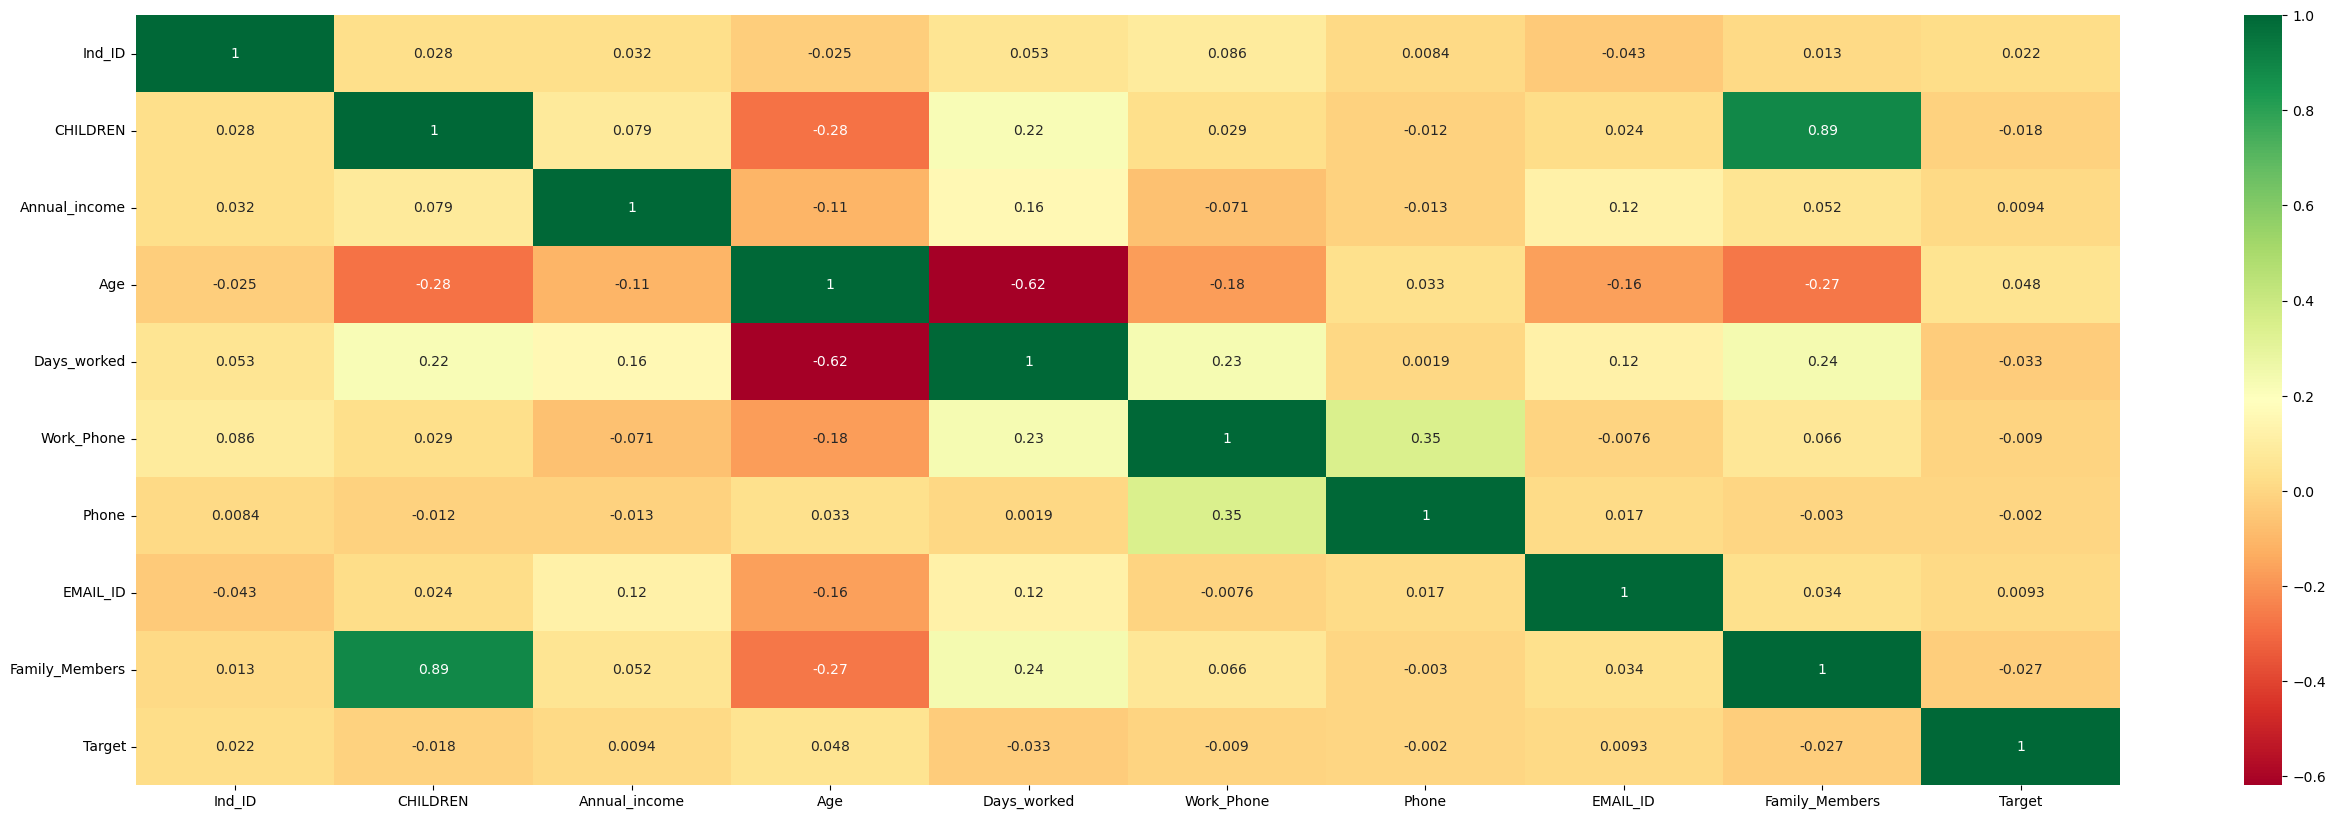

In [154]:
plt.figure(figsize=(32,10))
sns.heatmap(data.corr(),annot=True,cmap='RdYlGn')

In [155]:
data['Marital_status'].value_counts()

Married           1025
Single             224
Civil marriage     101
Separated           94
Widow               75
Name: Marital_status, dtype: int64

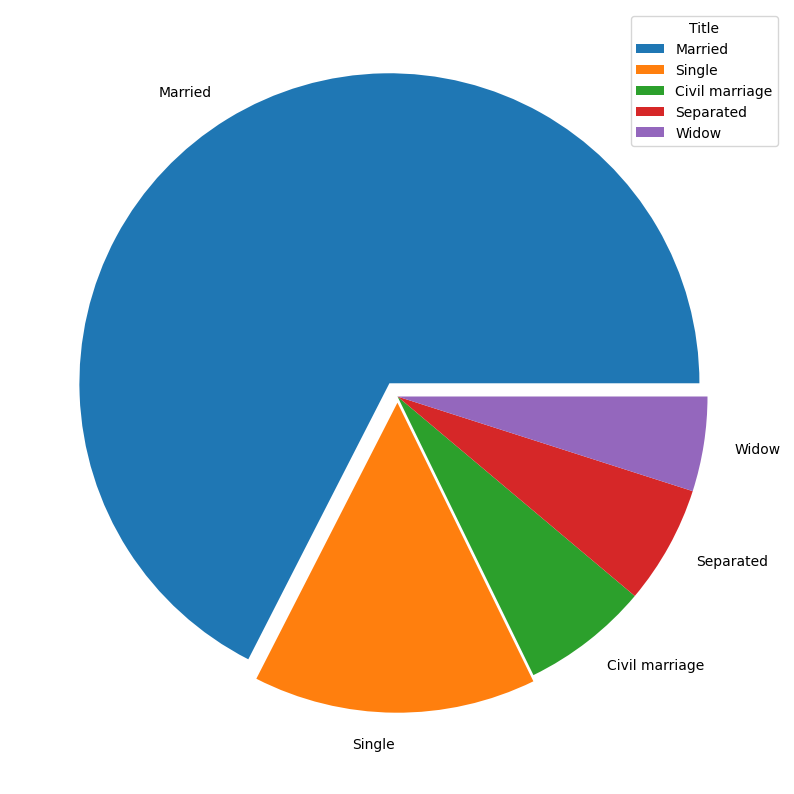

In [156]:
plt.figure(figsize=(10,12))
e=(0.05,0.02,0,0,0)
m=data['Marital_status']=='Married'
m=m.sum()
s=data['Marital_status']=='Single'
s=s.sum()
Cv=data['Marital_status']=='Civil marriage'
Cv=Cv.sum()
sep=data['Marital_status']=='Separated'
sep=sep.sum()
w=data['Marital_status']=='Widow'
w=w.sum()
y=np.array([m,s,Cv,sep,w])
label=['Married','Single','Civil marriage','Separated','Widow']
plt.pie(y,explode=e,labels=label)
plt.legend(title="Title")

From the above pie chart ,we conclude that majority of people are married so there expenses more than others.so, we can approve their credit card bcz they can use credit card regularly and in efficient manner for their expenses.

In [157]:
data['Housing_type'].value_counts()

House / apartment      1353
With parents             79
Municipal apartment      52
Rented apartment         21
Office apartment          9
Co-op apartment           5
Name: Housing_type, dtype: int64

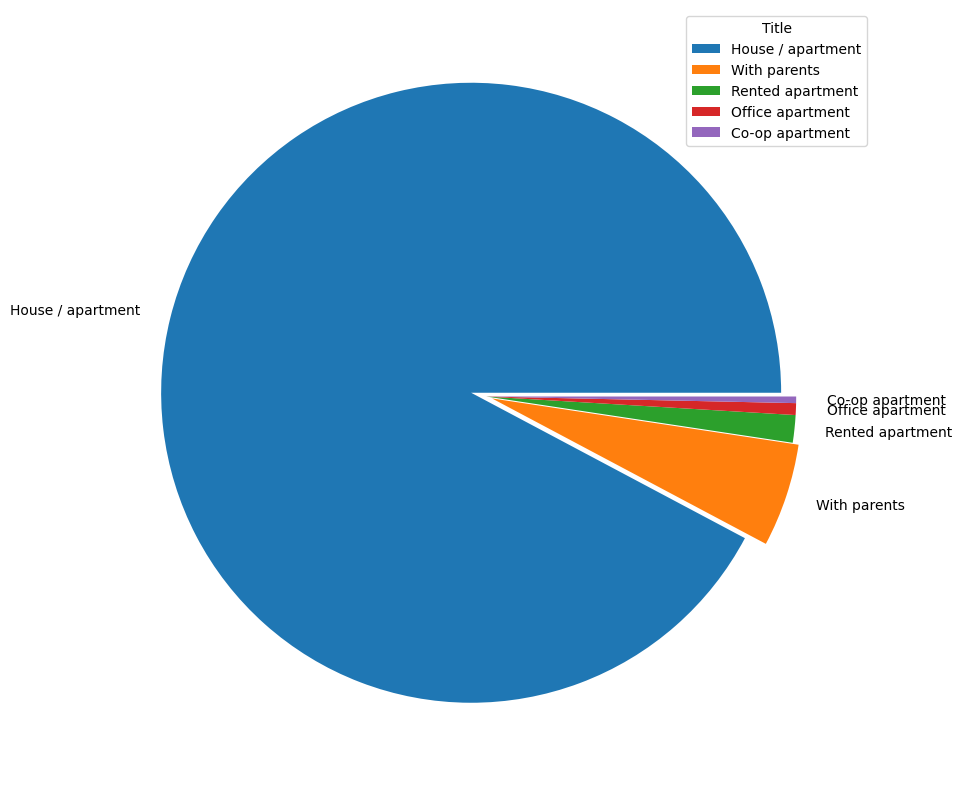

In [158]:
plt.figure(figsize=(10,12))
e=(0.05,0.02,0,0,0)
m=data['Housing_type']=='House / apartment'
m=m.sum()
s=data['Housing_type']=='With parents'
s=s.sum()
Cv=data['Housing_type']=='Rented apartment'
Cv=Cv.sum()
sep=data['Housing_type']=='Office apartment'
sep=sep.sum()
w=data['Housing_type']=='Co-op apartment'
w=w.sum()
y=np.array([m,s,Cv,sep,w])
label=['House / apartment','With parents','Rented apartment','Office apartment','Co-op apartment']
plt.pie(y,explode=e,labels=label)
plt.legend(title="Title")

From this above pie chart , we conclude that most of the people lives in their own house or apartment.So There is a high chance that they are able to pay their bills on time ,so we can approve their credit card

# Feature Scaling

In [159]:
# let's make all data in one scale,for that we have to first change the categorical data to numrical data .
data.head()

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Age,Days_worked,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,Target
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,51,-1000,0,0,0,Other,2,1
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,37,1,1,1,0,Other,2,1
3,5009749,F,Y,N,0,166500.0,Commercial associate,Higher education,Married,House / apartment,37,1,1,1,0,Other,2,1
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,37,1,1,1,0,Other,2,1
6,5009754,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,37,1,1,1,0,Other,2,1


In [160]:
data.describe()

,Ind_ID,CHILDREN,Annual_income,Age,Days_worked,Work_Phone,Phone,EMAIL_ID,Family_Members,Target
count,1.519000e+03,1519.000000,1.519000e+03,1519.000000,1519.000000,1519.000000,1519.000000,1519.000000,1519.000000,1519.000000
mean,5.078993e+06,0.414088,1.904075e+05,43.506254,-162.788018,0.206715,0.306122,0.093483,2.161290,0.110599
std,4.173057e+04,0.778727,1.123171e+05,11.571275,377.095959,0.405083,0.461033,0.291203,0.949823,0.313738
min,5.008827e+06,0.000000,3.375000e+04,21.000000,-1000.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,5.045158e+06,0.000000,1.215000e+05,34.000000,1.000000,0.000000,0.000000,0.000000,2.000000,0.000000
50%,5.078931e+06,0.000000,1.665000e+05,43.000000,4.000000,0.000000,0.000000,0.000000,2.000000,0.000000
75%,5.115675e+06,1.000000,2.250000e+05,53.000000,8.000000,0.000000,1.000000,0.000000,3.000000,0.000000
max,5.150412e+06,14.000000,1.575000e+06,68.000000,40.000000,1.000000,1.000000,1.000000,15.000000,1.000000


In [161]:
data.dtypes

Ind_ID               int64
GENDER              object
Car_Owner           object
Propert_Owner       object
CHILDREN             int64
Annual_income      float64
Type_Income         object
EDUCATION           object
Marital_status      object
Housing_type        object
Age                  int64
Days_worked          int64
Work_Phone           int64
Phone                int64
EMAIL_ID             int64
Type_Occupation     object
Family_Members       int64
Target               int64
dtype: object

In [162]:
#to convert catagirical to numerical
from sklearn.preprocessing import LabelEncoder

In [163]:
le=LabelEncoder()

In [164]:
data["Type_Income"]=le.fit_transform(data["Type_Income"])
data["EDUCATION"]=le.fit_transform(data["EDUCATION"])
data["Type_Occupation"]=le.fit_transform(data["Type_Occupation"])
data["Housing_type"]=le.fit_transform(data["Housing_type"])
data["Marital_status"]=le.fit_transform(data["Marital_status"])



In [165]:
data.head()

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Age,Days_worked,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,Target
0,5008827,M,Y,Y,0,180000.0,1,1,1,1,51,-1000,0,0,0,12,2,1
1,5009744,F,Y,N,0,315000.0,0,1,1,1,37,1,1,1,0,12,2,1
3,5009749,F,Y,N,0,166500.0,0,1,1,1,37,1,1,1,0,12,2,1
4,5009752,F,Y,N,0,315000.0,0,1,1,1,37,1,1,1,0,12,2,1
6,5009754,F,Y,N,0,315000.0,0,1,1,1,37,1,1,1,0,12,2,1


In [166]:
data.drop(['GENDER','Car_Owner','Propert_Owner','Days_worked','Work_Phone','Phone','EMAIL_ID'],inplace=True,axis=1)

In [167]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1519 entries, 0 to 1547
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Ind_ID           1519 non-null   int64  
 1   CHILDREN         1519 non-null   int64  
 2   Annual_income    1519 non-null   float64
 3   Type_Income      1519 non-null   int32  
 4   EDUCATION        1519 non-null   int32  
 5   Marital_status   1519 non-null   int32  
 6   Housing_type     1519 non-null   int32  
 7   Age              1519 non-null   int64  
 8   Type_Occupation  1519 non-null   int32  
 9   Family_Members   1519 non-null   int64  
 10  Target           1519 non-null   int64  
dtypes: float64(1), int32(5), int64(5)
memory usage: 112.7 KB


In [168]:
x=data.drop('Target',axis=1)
y=data['Target']

In [169]:
feature_scale = [feature for feature in data.columns if feature!='Target']

from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(x)

MinMaxScaler()

In [170]:
scaler.transform(x)

array([[0.        , 0.        , 0.09489051, ..., 0.63829787, 0.66666667,
        0.07142857],
       [0.00647667, 0.        , 0.18248175, ..., 0.34042553, 0.66666667,
        0.07142857],
       [0.00651199, 0.        , 0.08613139, ..., 0.34042553, 0.66666667,
        0.07142857],
       ...,
       [0.75689515, 0.14285714, 0.09489051, ..., 0.31914894, 0.55555556,
        0.21428571],
       [0.77262422, 0.        , 0.15328467, ..., 0.42553191, 0.22222222,
        0.07142857],
       [0.31756895, 0.        , 0.12408759, ..., 0.5106383 , 0.66666667,
        0.07142857]])

In [171]:
data = pd.concat([data['Target'].reset_index(drop=True),
                    pd.DataFrame(scaler.transform(x), columns=feature_scale)],
                    axis=1)

In [172]:
data.head()

,Target,Ind_ID,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Age,Type_Occupation,Family_Members
0,1,0.000000,0.0,0.094891,0.333333,0.25,0.25,0.2,0.638298,0.666667,0.071429
1,1,0.006477,0.0,0.182482,0.000000,0.25,0.25,0.2,0.340426,0.666667,0.071429
2,1,0.006512,0.0,0.086131,0.000000,0.25,0.25,0.2,0.340426,0.666667,0.071429
3,1,0.006533,0.0,0.182482,0.000000,0.25,0.25,0.2,0.340426,0.666667,0.071429
4,1,0.006547,0.0,0.182482,0.000000,0.25,0.25,0.2,0.340426,0.666667,0.071429


In [173]:
data.Target.value_counts()

0    1351
1     168
Name: Target, dtype: int64

# Dealing with Unbalanced Dataset

In [174]:
from imblearn.over_sampling import SMOTE
sm=SMOTE()


In [175]:
data.shape

(1519, 11)

In [176]:
x_res,y_res=sm.fit_resample(x,y)

In [177]:
x_res.shape

(2702, 10)

In [178]:
y_res.shape

(2702,)

In [179]:
from collections import Counter

In [180]:
print('original dataset shape {}'.format(Counter(y)))
print('Resampled dataset shape {}'.format(Counter(y_res)))

original dataset shape Counter({0: 1351, 1: 168})
Resampled dataset shape Counter({1: 1351, 0: 1351})


# Splitting

In [181]:
from sklearn.model_selection import train_test_split

In [182]:
x_train,x_test,y_train,y_test=train_test_split(x_res,y_res,test_size=0.2,random_state=567)

In [183]:
x_train.shape,y_train.shape

((2161, 10), (2161,))

# TRAINING THE MODEL 

# LogisticRegression

In [184]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,auc

In [185]:
from sklearn.linear_model import LogisticRegression

In [186]:
lr=LogisticRegression()

In [187]:
lr.fit(x_train,y_train)

LogisticRegression()

In [188]:
pred=lr.predict(x_test)

In [189]:
print(confusion_matrix(y_test,pred))

[[249   9]
 [252  31]]


In [190]:
print(accuracy_score(y_test,pred))

0.5175600739371534


In [191]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.50      0.97      0.66       258
           1       0.78      0.11      0.19       283

    accuracy                           0.52       541
   macro avg       0.64      0.54      0.42       541
weighted avg       0.64      0.52      0.41       541



# Decision Tree Classifier

In [192]:
#working with classifier 
from sklearn.tree import DecisionTreeClassifier

In [193]:
dt=DecisionTreeClassifier()

In [194]:
dt.fit(x_train,y_train) #it is useful to train model

DecisionTreeClassifier()

In [195]:
pred1=dt.predict(x_test)

In [196]:
print(confusion_matrix(pred1,y_test))

[[220  25]
 [ 38 258]]


In [197]:
print(classification_report(pred1,y_test))

              precision    recall  f1-score   support

           0       0.85      0.90      0.87       245
           1       0.91      0.87      0.89       296

    accuracy                           0.88       541
   macro avg       0.88      0.88      0.88       541
weighted avg       0.88      0.88      0.88       541



# Random Forest Classifier

In [198]:
from sklearn.ensemble import RandomForestClassifier

In [199]:
rf=RandomForestClassifier()

In [200]:
rf.fit(x_train,y_train)

RandomForestClassifier()

In [201]:
pred2=rf.predict(x_test)

In [202]:
print(classification_report(pred2,y_test))

              precision    recall  f1-score   support

           0       0.95      0.90      0.93       271
           1       0.91      0.95      0.93       270

    accuracy                           0.93       541
   macro avg       0.93      0.93      0.93       541
weighted avg       0.93      0.93      0.93       541



# KNeighbors Classifier

In [203]:
from sklearn.neighbors import KNeighborsClassifier

In [204]:
#start with random value of k
knn=KNeighborsClassifier(n_neighbors=3)

In [205]:
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [206]:
pred4=knn.predict(x_test)

In [207]:
pd.Series(pred4).value_counts()

1    289
0    252
dtype: int64

In [208]:
y_test.value_counts()

1    283
0    258
Name: Target, dtype: int64

In [209]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

<Axes: >

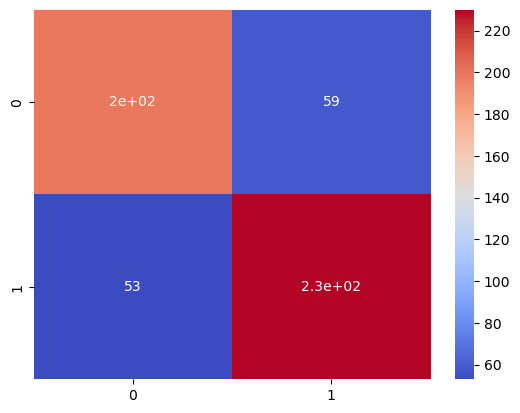

In [210]:
sns.heatmap(confusion_matrix(y_test,pred4),cmap='coolwarm',annot=True)

In [211]:
confusion_matrix(y_test,pred4)

array([[199,  59],
       [ 53, 230]], dtype=int64)

In [212]:
print(classification_report(y_test,pred4))

              precision    recall  f1-score   support

           0       0.79      0.77      0.78       258
           1       0.80      0.81      0.80       283

    accuracy                           0.79       541
   macro avg       0.79      0.79      0.79       541
weighted avg       0.79      0.79      0.79       541

